In [1]:
import yfinance as yf
import math
import pandas as pd 
import time
import matplotlib.pyplot as plt 
def log_base_e( input ):
    return math.log( input , math.exp(1) ) 
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
stocks_name = "MU SIRI ECA PFE YPF"
stocks_key = ["MU" , "SIRI" , "ECA" , "PFE" , "YPF"]
focus_main_key = 'Adj Close'

In [37]:
data = yf.download( stocks_name , start="2009-04-04", end="2019-04-04")
data.fillna(method='bfill', inplace=True)

[*********************100%***********************]  5 of 5 completed


In [86]:
# Function handle
def clear_data( data ):
    try:
        data = data.drop( columns="Close" )
        data = data.drop( columns="High" )
        data = data.drop( columns="Low" )
        data = data.drop( columns="Open" )
        data = data.drop( columns="Volume")
    except:
        None
    return data

def simple_return( current , previous ):
    return ( current / previous ) - 1 

def add_simple_daily_return( data ):
    simple_daily_return = data.tail(data.shape[0]-1)[ focus_main_key ]
    for key in simple_daily_return.keys():
        for order in range( simple_daily_return.shape[0] ):
            simple_daily_return[key][order] = simple_return( simple_daily_return[key][order] 
                                                        , data[focus_main_key][key][order])
    return simple_daily_return

In [87]:
temporary = add_simple_daily_return( data )

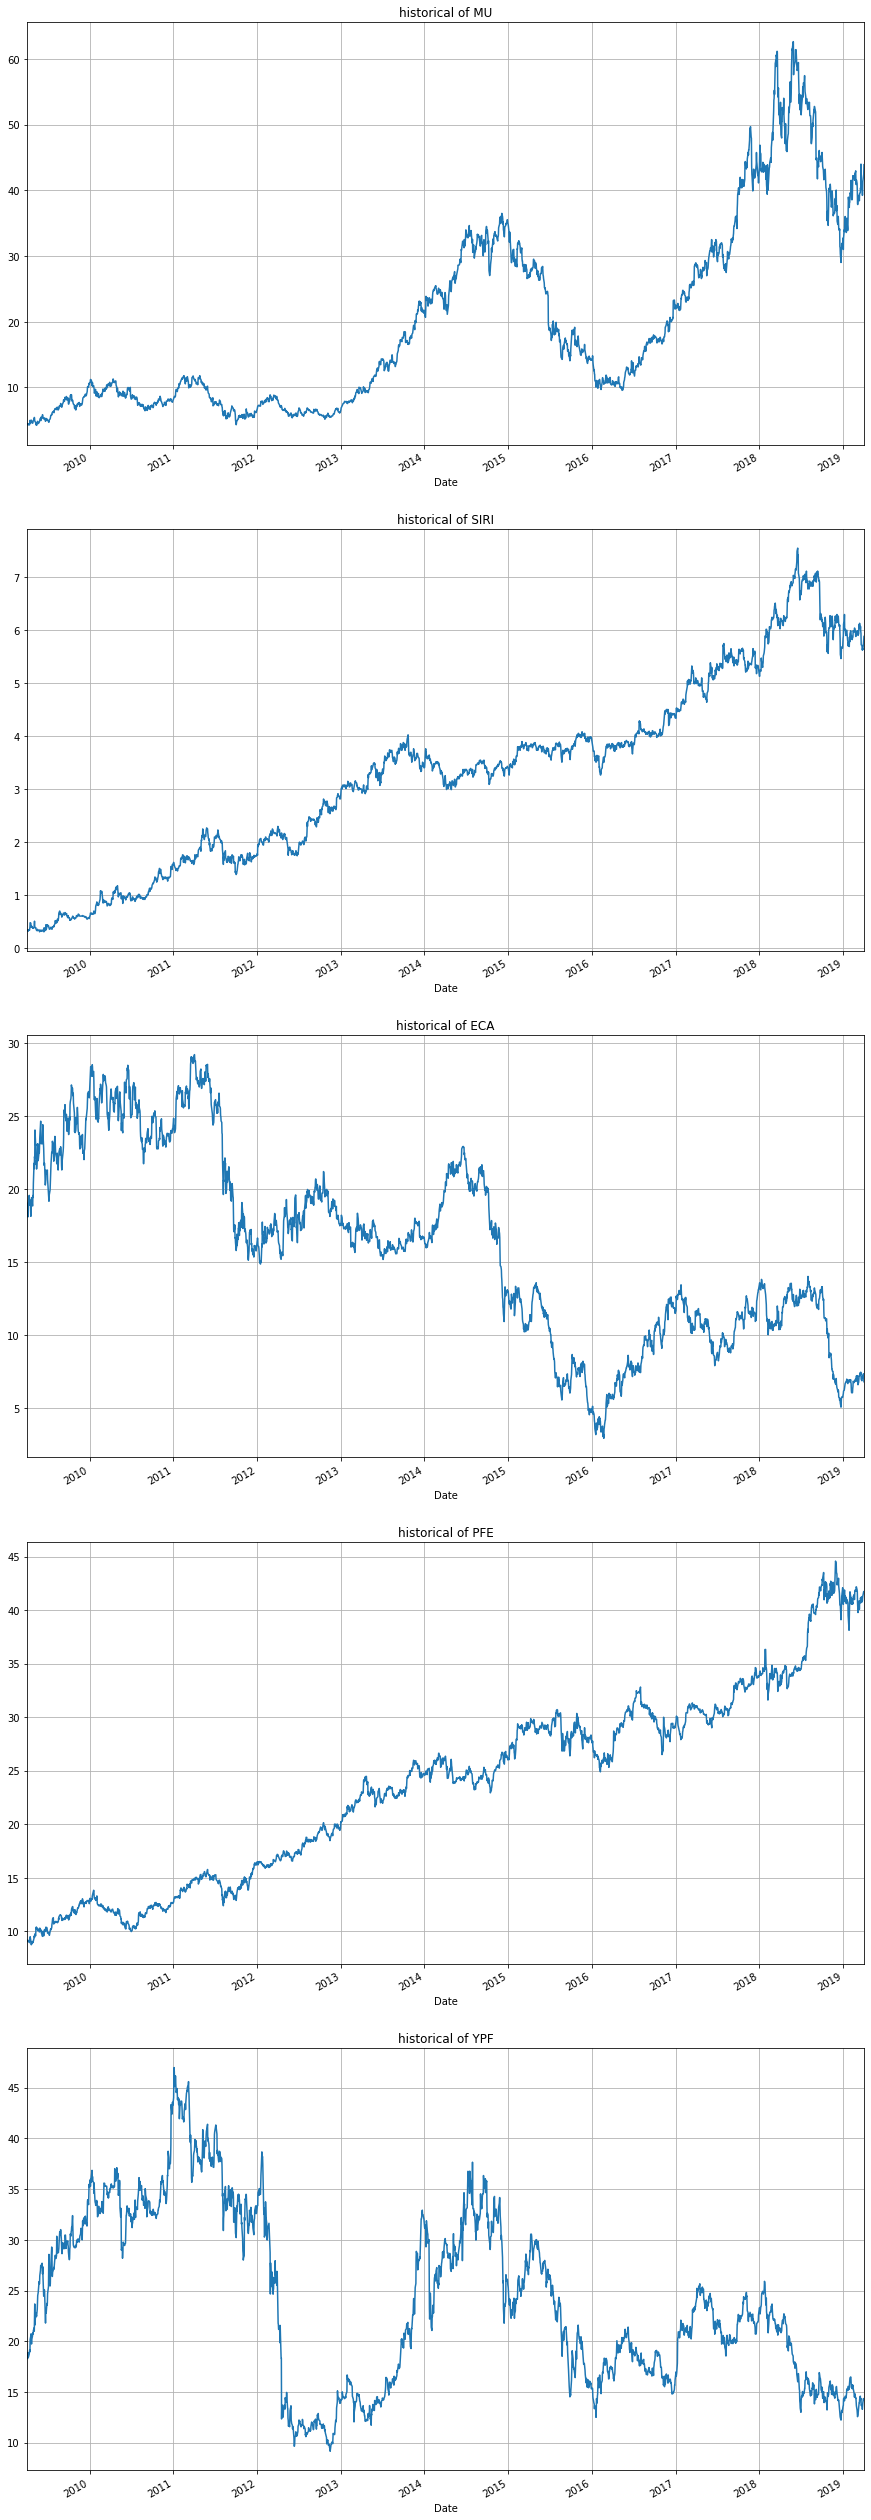

In [43]:
data = clear_data( data )
for run in range( 1 , 6 ):
    plt.subplot( 5 , 1, run )
    data[ focus_main_key ][ stocks_key[ run - 1 ] ].plot( grid = True , figsize=( 15 , 50 ))
    title( 'historical of ' + stocks_key[ run - 1 ])

In [99]:
data.insert(2 , "Simple Daily Return" , temporary , True )

ValueError: Wrong number of items passed 5, placement implies 1

In [77]:
len( test["YPF"] )

2517

In [88]:
temporary

,ECA,MU,PFE,SIRI,YPF
Date,,,,,
2009-04-06,-0.013845,0.004444,0.011808,0.028571,-0.009069
2009-04-07,-0.035553,-0.046460,-0.014588,-0.055556,0.032630
2009-04-08,0.014323,-0.006960,-0.002220,-0.029412,0.000000
2009-04-09,0.042592,0.039720,0.005193,0.060606,-0.024663
2009-04-13,0.022869,-0.013483,-0.005166,0.028571,0.017385
...,...,...,...,...,...
2019-03-28,-0.002797,0.002804,0.006426,0.005300,0.023169
2019-03-29,0.015428,0.050585,0.004256,-0.003515,0.023375
2019-04-01,0.022099,0.022260,0.008712,0.021164,0.031406
